In [75]:
import pandas as pd
import numpy as np
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14,8
RANDOM_SEED = 42
TARGET = ["Normal", "Fraud"]


In [21]:
data=pd.read_csv("C:/Users/JISNA/Downloads/fraud_detection.csv" , sep= ",")

In [22]:
data

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
0,0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,...,1,1,0,1,1,0,Laborers,1.0,2,2
1,1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,...,1,1,0,1,1,0,Core staff,2.0,1,1
2,2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,...,1,1,1,1,1,0,Laborers,1.0,2,2
3,3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,...,1,1,0,1,0,0,Laborers,2.0,2,2
4,4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,...,1,1,0,1,0,0,Core staff,1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,...,1,1,0,1,0,0,Sales staff,1.0,1,1
307507,307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,...,1,0,0,1,1,0,NaN,1.0,2,2
307508,307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,...,1,1,0,1,0,1,Managers,1.0,3,3
307509,307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,...,1,1,0,1,0,0,Laborers,2.0,2,2


In [23]:
data.shape

(307511, 33)

In [24]:
data.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
0,0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,...,1,1,0,1,1,0,Laborers,1.0,2,2
1,1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,...,1,1,0,1,1,0,Core staff,2.0,1,1
2,2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,...,1,1,1,1,1,0,Laborers,1.0,2,2
3,3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,...,1,1,0,1,0,0,Laborers,2.0,2,2
4,4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,...,1,1,0,1,0,0,Core staff,1.0,2,2


In [25]:
data.values

array([[0, 100002, 1, ..., 1.0, 2, 2],
       [1, 100003, 0, ..., 2.0, 1, 1],
       [2, 100004, 0, ..., 1.0, 2, 2],
       ...,
       [307508, 456253, 0, ..., 1.0, 3, 3],
       [307509, 456254, 1, ..., 2.0, 2, 2],
       [307510, 456255, 0, ..., 2.0, 1, 1]], dtype=object)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   307511 non-null  int64  
 1   SK_ID_CURR                   307511 non-null  int64  
 2   TARGET                       307511 non-null  int64  
 3   NAME_CONTRACT_TYPE           307511 non-null  object 
 4   CODE_GENDER                  307511 non-null  object 
 5   FLAG_OWN_CAR                 307511 non-null  object 
 6   FLAG_OWN_REALTY              307511 non-null  object 
 7   CNT_CHILDREN                 307511 non-null  int64  
 8   AMT_INCOME_TOTAL             307511 non-null  float64
 9   AMT_CREDIT                   307511 non-null  float64
 10  AMT_ANNUITY                  307499 non-null  float64
 11  AMT_GOODS_PRICE              307233 non-null  float64
 12  NAME_TYPE_SUITE              306219 non-null  object 
 13 

In [27]:
columns = data.columns.tolist()
columns =[c for c in columns if c not in ["TARGET"]]
target = "TARGET"
state = np.random.RandomState(42)
x = data[columns]
y = data[target]
x_outliers = state.uniform(low=0, high=1, size=(x.shape[0], x.shape[1]))
print(x.shape)
print(y.shape)

(307511, 32)
(307511,)


In [28]:
data.isnull().values.any()

True

Text(0, 0.5, 'Frequency')

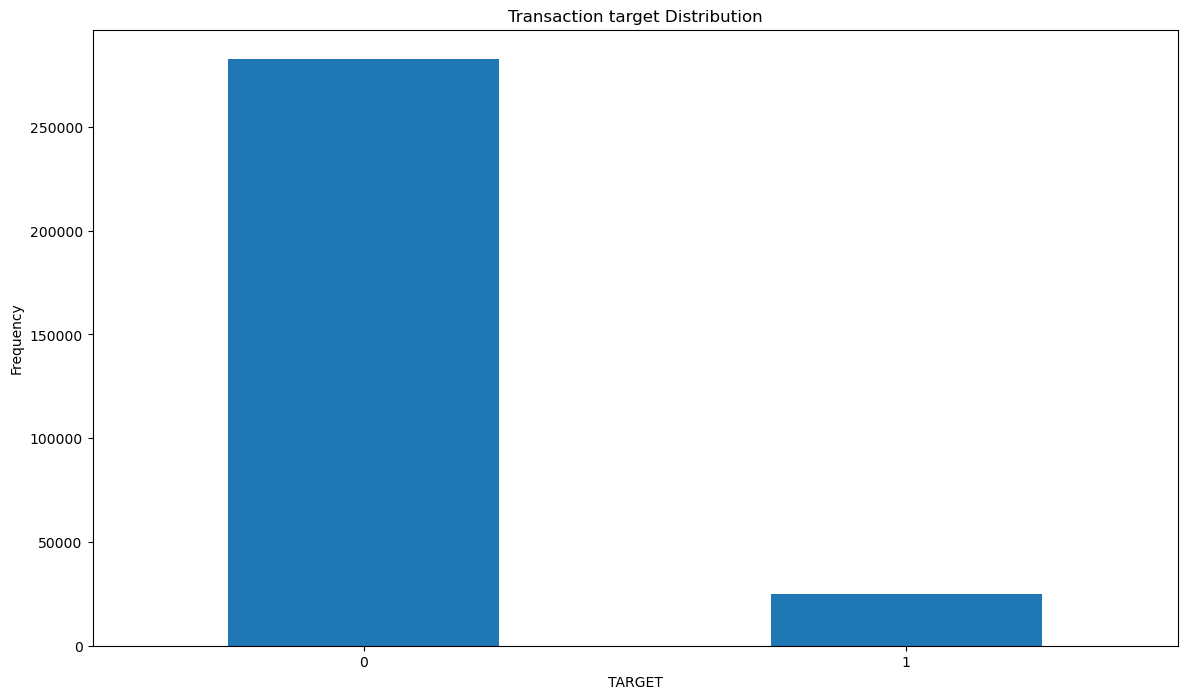

In [29]:
count_target = pd.value_counts(data['TARGET'], sort = True)
count_target.plot(kind = 'bar', rot=0)
plt.title("Transaction target Distribution")
plt.xticks(range(2))
plt.xlabel("TARGET")
plt.ylabel("Frequency")


In [49]:
fraud = data[data['TARGET']==1]
normal = data[data['TARGET']==0]

In [50]:
print(fraud.shape,normal.shape)

(24825, 34) (282686, 34)


In [56]:

print(data.columns)


Index(['Unnamed: 0', 'SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'NAME_CONTRACT_TYPE_Cash loans', 'NAME_CONTRACT_TYPE_Revolving loans'],
      dtype='object')


In [59]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [60]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE




In [61]:
smk = SMOTETomek(random_state=42)

In [76]:
X_resampled, y_resampled = smk.fit_resample(X_train, y_train)



In [77]:
X_resampled.shape,X_resampled.shape

((758, 20), (758, 20))

In [78]:
print("Class distribution before resampling:", dict(zip(*np.unique(y_train, return_counts=True))))
print("Class distribution after resampling:", dict(zip(*np.unique(y_resampled, return_counts=True))))

Class distribution before resampling: {0: 397, 1: 403}
Class distribution after resampling: {0: 379, 1: 379}
